Problem set 1 
Katia Yesiyeva

Data sources: 
Investing. com 

SS&P 500 (SPX) 10-year daily data 
Values shown are daily closing prices.
https://www.investing.com/indices/us-spx-500-historical-data?cid=40826


Apple Inc (AAPL)
https://www.investing.com/equities/apple-computer-inc-historical-data

Microsoft Corporation (MSFT)
https://www.investing.com/equities/microsoft-corp-historical-data

Amazon.com Inc (AMZN), NASDAQ
https://www.investing.com/equities/amazon-com-inc-historical-data

Alphabet Inc Class A (GOOGL)
https://www.investing.com/equities/google-inc-historical-data

NVIDIA Corporation (NVDA)
https://www.investing.com/equities/nvidia-corp-historical-data

4-Week Treasury Bill Secondary Market Rate, Discount Basis (DTB4WK)
Percent,
Not Seasonally Adjusted
https://fred.stlouisfed.org/series/DTB4WK


In [225]:
import pandas as pd 
import numpy as np

In [226]:
df_sp500 = pd.read_csv('/Users/katyasva/Downloads/S&P 500 Historical Data.csv')
df_nvd = pd.read_csv('/Users/katyasva/Downloads/NVIDIA Stock Price History.csv')
df_alpha = pd.read_csv('/Users/katyasva/Downloads/Alphabet A Stock Price History.csv')
df_am = pd.read_csv('/Users/katyasva/Downloads/Amazon.com Stock Price History.csv')
df_mic = pd.read_csv('/Users/katyasva/Downloads/Microsoft Stock Price History.csv')
df_apple = pd.read_csv('/Users/katyasva/Downloads/Apple Stock Price History.csv')
df_bond = pd.read_csv('/Users/katyasva/Downloads/DTB4WK.csv')

#df_sp500['Price'] = df_sp500['Price'].str.replace(',', '').astype(float)
##df_sp500['Return'] = df_sp500['Price'].pct_change() * 100 
#df_sp500['Log_Return'] = np.log(df_sp500['Price'] / df_sp500['Price'].shift(1)) * 100 


In [227]:
df_bond['observation_date'] = pd.to_datetime(df_bond['observation_date'])
df_bond = df_bond.sort_values(by="observation_date")


In [228]:
df_bond.dtypes

observation_date    datetime64[ns]
DTB4WK                     float64
dtype: object

In [229]:
df_apple = df_apple.drop(df_apple.index[[2245, 2246]])

In [230]:
df_list = [df_am, df_alpha, df_mic, df_nvd, df_sp500, df_apple]
for df in df_list:
        df['Change'] = df['Change %'].astype(str).str.replace('%','').str.replace(',', '').astype(float)


In [231]:
dfs = {
    'S&P 500': df_sp500['Change'].describe(),
    'NVD': df_nvd['Change'].describe(),
    'App': df_apple['Change'].describe(),
    'Mic': df_mic['Change'].describe(),
    'AM': df_am['Change'].describe(),
    'ALPH': df_alpha['Change'].describe(),
    'Bond_4': df_bond['DTB4WK'].describe()

}


summary_table = pd.DataFrame(dfs)
summary_table 

,S&P 500,NVD,App,Mic,AM,ALPH,Bond_4
count,2536.000000,2537.000000,2535.000000,2537.000000,2536.000000,2537.000000,2521.000000
mean,0.048785,1.766054,0.100895,0.100946,0.128837,0.808092,1.717144
std,1.120951,77.661494,1.794874,1.713204,2.060137,37.800556,1.874371
min,-11.980000,-97.540000,-12.870000,-14.740000,-14.050000,-95.050000,-0.040000
25%,-0.380000,-1.340000,-0.740000,-0.680000,-0.862500,-0.750000,0.090000
50%,0.065000,0.120000,0.080000,0.090000,0.110000,0.120000,0.980000
75%,0.580000,1.820000,1.010000,0.980000,1.135000,0.970000,2.390000
max,9.380000,3907.590000,11.970000,14.220000,14.100000,1899.500000,5.780000


In [232]:
import matplotlib.pyplot as plt

In [233]:
df_bond['Date'] = df_bond['observation_date']
#df_bond.set_index('Date', inplace=True)


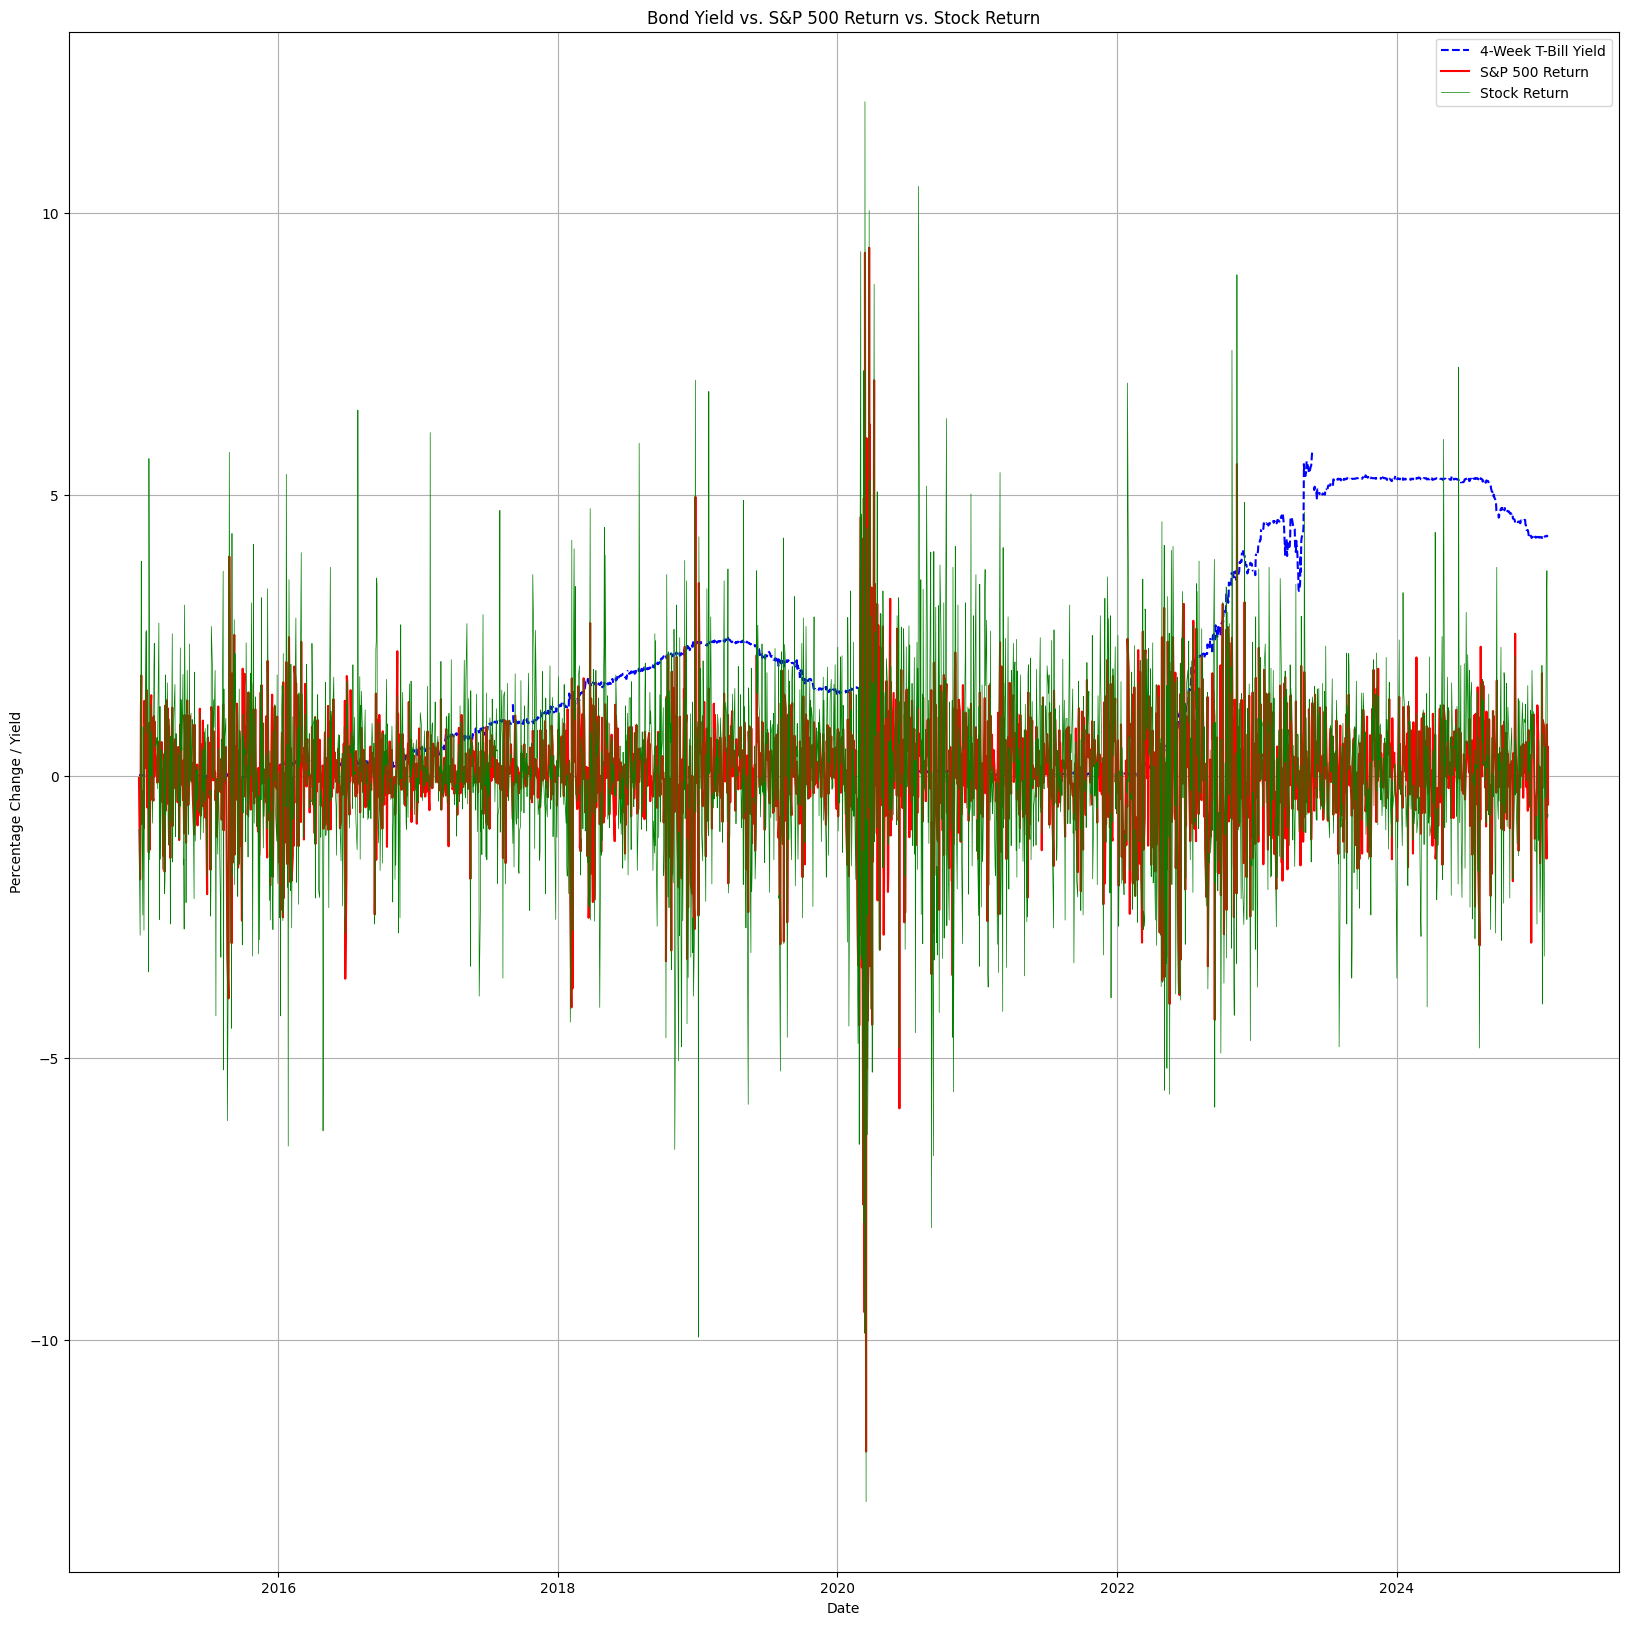

In [234]:
df_sp500['Date'] = pd.to_datetime(df_sp500['Date'], errors='coerce')
df_apple['Date'] = pd.to_datetime(df_apple['Date'], errors='coerce')

df_apple.sort_values(by="Date")
df_sp500.sort_values(by="Date")

plt.figure(figsize=(20, 20))

# Plot Bond Yield
plt.plot(df_bond['Date'], df_bond['DTB4WK'], label="4-Week T-Bill Yield", color='blue', linestyle='dashed')

# Plot Index Return (S&P 500)
plt.plot(df_sp500['Date'], df_sp500['Change'], label="S&P 500 Return", color='red')

# Plot Individual Stock Return
plt.plot(df_apple['Date'], df_apple['Change'], label="Stock Return", color='green', linewidth=0.5)

# Labels & Title
plt.xlabel("Date")
plt.ylabel("Percentage Change / Yield")
plt.title("Bond Yield vs. S&P 500 Return vs. Stock Return")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
df['excess return'] = df['change'] - df_bond['']
df_sp500['excess return'] = df['change'] - df_bond['']

#regression
#df['excess return'] = a + beta(df_sp500['excess return']) + error 

In [235]:
for df in df_list:
    if 'Date' in df.columns:  # Check if "Date" exists before modifying
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [236]:
df_bond['Change']= df_bond['DTB4WK']


In [237]:
df_bond.set_index('Date', inplace=True)


In [241]:
import pandas as pd

# Assuming df_am, df_alpha, df_mic, df_nvd, df_sp500, df_bond exist

# Dictionary of DataFrames with their respective suffixes
df_dict = {
    'am': df_am,
    'alpha': df_alpha,
    'mic': df_mic,
    'nvd': df_nvd,
    'sp500': df_sp500,
    'apple':df_apple,
    'bond': df_bond
}

# Ensure 'Date' is a column in all DataFrames
df_list = []
for key, df in df_dict.items():
    df = df.reset_index() if df.index.name == 'Date' else df  # Reset index if Date is the index
    df_renamed = df[['Date', 'Change']].rename(columns={'Change': f'Change_{key}'})
    df_list.append(df_renamed)

# Merging all DataFrames on 'Date'
df_merged = df_list[0]
for df in df_list[1:]:
    df_merged = df_merged.merge(df, on='Date', how='outer')
df_merged

,Date,Change_am,Change_alpha,Change_mic,Change_nvd,Change_sp500,Change_apple,Change_bond
0,2015-01-02,-0.58,-0.19,0.67,0.00,-0.03,-0.94,0.02
1,2015-01-05,-2.07,-1.93,-0.92,-2.00,-1.83,-2.82,0.02
2,2015-01-06,-2.32,-2.46,-1.47,-2.04,-0.89,0.04,0.02
3,2015-01-07,1.08,-0.28,1.27,0.00,1.16,1.39,0.02
4,2015-01-08,0.67,0.36,2.94,4.17,1.79,3.82,0.01
...,...,...,...,...,...,...,...,...
2627,2025-01-27,0.24,-4.20,-2.14,-16.97,-1.46,3.18,4.26
2628,2025-01-28,1.16,1.82,2.91,8.93,0.92,3.65,4.27
2629,2025-01-29,-0.45,0.06,-1.09,-4.10,-0.47,0.46,4.26
2630,2025-01-30,-1.03,2.79,-6.18,0.77,0.53,-0.74,4.25


In [246]:
row = df_bond.loc['2015-01-02']
row

observation_date    2015-01-02 00:00:00
DTB4WK                             0.02
Change                             0.02
Name: 2015-01-02 00:00:00, dtype: object

In [ ]:
#!pip install statsmodels


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 9.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 9.2 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 9.4 MB/s eta 0:00:00 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 9.4 MB/s eta 0:00:00a 0:00:01


In [254]:
pip show statsmodels

Note: you may need to restart the kernel to use updated packages.


In [247]:
df_merged['excess_return_X_M'] = df_merged['Change_sp500'] - df_merged['Change_bond']
df_merged['excess_return_apple'] = df_merged['Change_apple'] - df_merged['Change_bond']


# Run Regression: df_apple['excess_return'] ~ df_sp500['excess_return']
X = df_merged['excess_return_X_M']  # Independent variable
y = df_merged['excess_return_apple']  # Dependent variable (Apple excess return)

X = sm.add_constant(X)

# Run OLS Regression
model = sm.OLS(y, X, missing='drop').fit()  # `missing='drop'` ensures NaN rows are dropped

# Print results
print(model.summary())

# Extract coefficients
alpha = model.params['const']  # Intercept (α)
beta = model.params['excess_return_X_M']  # Slope (β)

# Display extracted values
print(f"Alpha (Intercept): {alpha}")
print(f"Beta (Slope): {beta}")

NameError: name 'sm' is not defined